In [1]:
%matplotlib inline
# Call needed libraries
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import math
import os
import keras
from IPython.display import clear_output
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
from pprint import pprint

Using TensorFlow backend.


In [2]:
# Load and parse through the json files
# Create a dataframe of images as well as ages for each id in a seperate array

# Overall dataset
data_images = []
data_ages = []


# Read in the images by id and store dataframe into x_train and age into y_train
for f in range(100):
    with open('Json/'+ str(f) + '.json') as data_file:    
        data = json.load(data_file)
        for v in data.values():
            data_images.append(v['img'])
            age_bin = math.ceil((v['age'] / 10)) - 1
            data_ages.append(age_bin)
    

# Check the shape of the dataframes    
data_images = np.array(data_images)
data_ages = np.array(data_ages)
print(data_images.shape)
print(data_ages.shape)

(52938, 28, 28)
(52938,)


In [3]:
# Saved the ages into the array as a bin size of 10 from 0 to 100
data_ages[0]

2

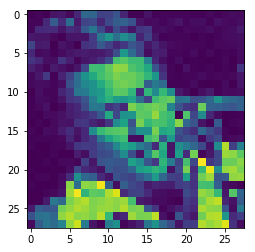

In [4]:
# plot the first image in the dataset
plt.imshow(data_images[0])

In [5]:
# Bins
# 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, 91-100

# Split into training and testing data
# x denotes the images, y denotes the ages
x_train = []
y_train = []

# x denotes the test images, y denotes the test ages
x_test = []
y_test = []

# Size overall = 52938
x_train = np.array(data_images[0:50000])
y_train = np.array(data_ages[0:50000])

x_test = np.array(data_images[50000:])
y_test = np.array(data_ages[50000:])

print(x_train.shape)
print(x_test.shape)

(50000, 28, 28)
(2938, 28, 28)


In [6]:
# Reshaping the test images to fit the model

# The number of images, size of images, grayscale indicator
x_train = x_train.reshape(50000, 28, 28, 1)
x_test = x_test.reshape(2938, 28, 28, 1)

In [7]:
# One-hot encode the ages/results 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# The first age is 24 so the category index is 2 from 0-9 bins

In [8]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot = PlotLosses()

In [10]:
# Create the sequential model from keras (CNN)
model = Sequential()

# Add the layers to the sequential model
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())

# This is our output layer; 10 nodes represent bins 0 - 9
model.add(Dense(10, activation='softmax'))

In [11]:
# Compile the model - include the accuracy metric and loss function
# Loss function for now is categorical_crossentropy
# loss='mean_squared_error'
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

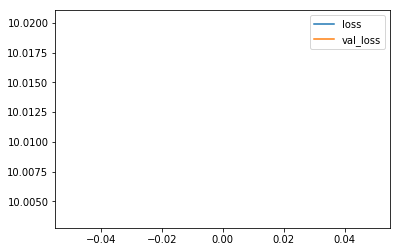

In [12]:
# Most important part - please work :(
# Training the model
# val_loss is the value of cost function for your cross validation data and loss is the value of cost function for your training data
number_of_epochs = 1
model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[plot], epochs=number_of_epochs)

In [13]:
# Predict using our trained model
model.predict(x_test[:10])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
# Check the accuracy of the prediction
y_test[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
model.save_weights('models/' + str(number_of_epochs) + '_epochs.h5')